<a href="https://colab.research.google.com/github/Jyts2094/Final-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount google drive in google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing necessary libraries
import pandas as pd
import nltk
import re

In [3]:
# load the dataset

dataset_path = '/content/drive/MyDrive/vaccination_all_tweets.csv'
dataset = pd.read_csv(dataset_path)
dataset.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [4]:
# print the dataset shape
dataset.shape

(228207, 16)

In [5]:
# create new dataframe with columns needed for analysis
extracted_data= pd.DataFrame()
extracted_data['text']= dataset['text']
extracted_data['hashtag']=dataset['hashtags']
extracted_data.shape

(228207, 2)

In [6]:
# find null values
extracted_data.isnull().sum()

,0
text,0
hashtag,49703


In [7]:
# remove data items with null values
extracted_data = extracted_data.dropna(subset=['text', 'hashtag'])
extracted_data.shape

(178504, 2)

In [8]:
# cleaning the text

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
nltk.download('stopwords')
nltk.download('punkt')

# Function to remove emojis
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# Function to clean text
def clean_text(text):
    # Remove emojis
    text = remove_emoji(text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Join tokens back into a single string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Apply cleaning function to text column
extracted_data['cleaned_text'] = extracted_data['text'].apply(clean_text)


extracted_data.head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,text,hashtag,cleaned_text
0,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],folks said daikon paste could treat cytokine s...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",coronavirus SputnikV AstraZeneca PfizerBioNTec...
4,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Explain need vaccine BorisJohnson MattHancock ...
6,it is a bit sad to claim the fame for success ...,['vaccination'],bit sad claim fame success vaccination patriot...
7,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",many bright days 2020 best 1 BidenHarris winni...


In [9]:
# Sentiment analysis

# Download the VADER lexicon to analyze the sentiments of social media text
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
# Initialize the VADER sentiment analyzer (an instance of SIA)
sid = SIA()

# Apply sentiment analysis to the 'cleaned_text' column
# The lambda function processes each text entry by:
# 1. Converting text to lowercase
# 2. Removing non-word characters
# 3. Calculating sentiment scores using VADER
extracted_data['sentiments'] = extracted_data['cleaned_text'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+', str(x).lower()))))

# Extract the positive sentiment score and add a small value to avoid zeroes
extracted_data['Positive Sentiment'] = extracted_data['sentiments'].apply(lambda x: x['pos'] + 1 * (10**-6))

# Extract the neutral sentiment score and add a small value to avoid zeroes
extracted_data['Neutral Sentiment'] = extracted_data['sentiments'].apply(lambda x: x['neu'] + 1 * (10**-6))

# Extract the negative sentiment score and add a small value to avoid zeroes
extracted_data['Negative Sentiment'] = extracted_data['sentiments'].apply(lambda x: x['neg'] + 1 * (10**-6))

# Combine the sentiment scores into a single sentiment value
# The sentiment score is calculated by subtracting the negative sentiment from the positive sentiment
extracted_data['Sentiment Score'] = extracted_data.apply(lambda row: row['Positive Sentiment'] - row['Negative Sentiment'], axis=1)

# Display the first few rows of the resulting DataFrame
extracted_data.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,text,hashtag,cleaned_text,sentiments,Positive Sentiment,Neutral Sentiment,Negative Sentiment,Sentiment Score
0,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],folks said daikon paste could treat cytokine s...,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp...",0.252001,0.748001,0.000001,0.252
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",coronavirus SputnikV AstraZeneca PfizerBioNTec...,"{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'comp...",0.154001,0.846001,0.000001,0.154
4,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Explain need vaccine BorisJohnson MattHancock ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000001,1.000001,0.000001,0.000
6,it is a bit sad to claim the fame for success ...,['vaccination'],bit sad claim fame success vaccination patriot...,"{'neg': 0.166, 'neu': 0.481, 'pos': 0.353, 'co...",0.353001,0.481001,0.166001,0.187
7,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",many bright days 2020 best 1 BidenHarris winni...,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...",0.677001,0.323001,0.000001,0.677


In [10]:
# creating reference tags for 5 vaccines -> Pfizer, Covaxin(Bharat Biotech), Sputnik,AstraZenca(Covishield),Moderna
pfizer_refs = ["Pfizer","pfizer","Pfizer–BioNTech","pfizer-bioNtech","BioNTech","biontech"]
bbiotech_refs = ["covax","covaxin","Covax","Covaxin","Bharat Biotech","bharat biotech","BharatBiotech","bharatbiotech"]
sputnik_refs = ["russia","sputnik","Sputnik","V"]
astra_refs = ['sii','SII','adar poonawalla','Covishield','covishield','astra','zenca','Oxford–AstraZeneca','astrazenca','oxford-astrazenca','serum institiute']
moderna_refs = ['moderna','Moderna','mRNA-1273','Spikevax']

In [11]:
# Define a function to check if a tweet contains any of the references
def refer(tweet, refs):
    flag = 0  # Initialize flag to 0 (not found)
    for ref in refs:
        if tweet.find(ref) != -1:  # Check if the tweet contains the reference
            flag = 1  # Set flag to 1 (found) if reference is found
    return flag  # Return flag indicating if any reference was found in the tweet

# Apply the refer function to each row in 'cleaned_text' column for different references
extracted_data['pfizer'] = extracted_data['cleaned_text'].apply(lambda x: refer(x, pfizer_refs))
extracted_data['bbiotech'] = extracted_data['cleaned_text'].apply(lambda x: refer(x, bbiotech_refs))
extracted_data['sputnik'] = extracted_data['cleaned_text'].apply(lambda x: refer(x, sputnik_refs))
extracted_data['astra'] = extracted_data['cleaned_text'].apply(lambda x: refer(x, astra_refs))
extracted_data['moderna'] = extracted_data['cleaned_text'].apply(lambda x: refer(x, moderna_refs))

# Display the counts of 'pfizer', 'bbiotech', 'sputnik', 'astra', 'moderna' flags
# This shows how many tweets mention each reference
display(
    extracted_data['pfizer'].value_counts(),
    extracted_data['bbiotech'].value_counts(),
    extracted_data['sputnik'].value_counts(),
    extracted_data['astra'].value_counts(),
    extracted_data['moderna'].value_counts()
    )

,count
pfizer,
0,157965
1,20539


,count
bbiotech,
0,146610
1,31894


,count
sputnik,
1,100237
0,78267


,count
astra,
0,172476
1,6028


,count
moderna,
0,133591
1,44913


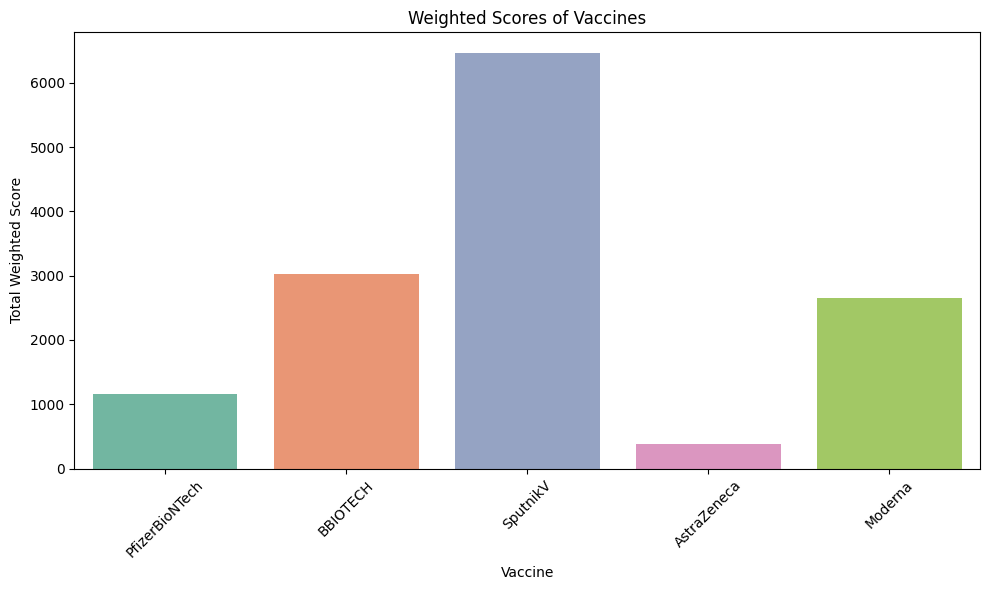

Best Recommended Vaccine: SputnikV
Total Weighted Score: 6462.736000000001


In [12]:
#plotting the graph
import matplotlib.pyplot as plt
import seaborn as sns

 #Define the weight for sentiment score (assuming sentiment score is directly usable)
sentiment_weight = 1.0

# Calculate weighted scores for each vaccine
extracted_data['pfizer_score'] = extracted_data['Sentiment Score'] * sentiment_weight * extracted_data['pfizer']
extracted_data['bbiotech_score'] = extracted_data['Sentiment Score'] * sentiment_weight * extracted_data['bbiotech']
extracted_data['sputnik_score'] = extracted_data['Sentiment Score'] * sentiment_weight * extracted_data['sputnik']
extracted_data['astra_score'] = extracted_data['Sentiment Score'] * sentiment_weight * extracted_data['astra']
extracted_data['moderna_score'] = extracted_data['Sentiment Score'] * sentiment_weight * extracted_data['moderna']

# Sum up the scores for each vaccine
total_pfizer_score = extracted_data['pfizer_score'].sum()
total_bbiotech_score = extracted_data['bbiotech_score'].sum()
total_sputnik_score = extracted_data['sputnik_score'].sum()
total_astra_score = extracted_data['astra_score'].sum()
total_moderna_score = extracted_data['moderna_score'].sum()

# Create a dictionary of scores for plotting
vaccine_scores = {
    'PfizerBioNTech': total_pfizer_score,
    'BBIOTECH': total_bbiotech_score,
    'SputnikV': total_sputnik_score,
    'AstraZeneca': total_astra_score,
    'Moderna': total_moderna_score
}

# Convert scores to list for plotting
vaccines = list(vaccine_scores.keys())
scores = list(vaccine_scores.values())

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=vaccines, y=scores, palette='Set2', hue=vaccines, dodge=False, legend=False)
plt.xlabel('Vaccine')
plt.ylabel('Total Weighted Score')
plt.title('Weighted Scores of Vaccines')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Determine the best recommended vaccine based on the highest total weighted score
best_vaccine = max(vaccine_scores, key=vaccine_scores.get)
best_score = vaccine_scores[best_vaccine]

print("Best Recommended Vaccine:", best_vaccine)
print("Total Weighted Score:", best_score)

In [13]:
!pip install tensorflow

from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint


max_words = 5000  # Maximum number of words to keep based on frequency
max_len = 200  # Maximum length of sequences (tweets)

# Tokenization and Sequencing
tokenizer = Tokenizer(num_words=max_words)  # Initialize Tokenizer with max_words vocabulary size
tokenizer.fit_on_texts(extracted_data['cleaned_text'])  # Fit tokenizer on the cleaned text data
sequences = tokenizer.texts_to_sequences(extracted_data['cleaned_text'])  # Convert text to sequences of integers
tweets = pad_sequences(sequences, maxlen=max_len)  # Pad sequences to ensure uniform length

print(tweets)


[[   0    0    0 ...  215 4750   35]
 [   0    0    0 ...  167  305 4751]
 [   0    0    0 ... 1689 4752  786]
 ...
 [   0    0    0 ...    5   13  121]
 [   0    0    0 ...   73    3    9]
 [   0    0    0 ...    5   13  116]]


In [15]:
import numpy as np
import tensorflow as tf


labels = np.array(extracted_data['Sentiment Score'])  # Extract sentiment scores as numpy array

y = []
for i in range(len(labels)):
    if labels[i] == 0:
        y.append(0)  # Assign label 0 for sentiment score of 0
    elif labels[i] < 0:
        y.append(1)  # Assign label 1 for negative sentiment scores
    elif labels[i] > 0:
        y.append(2)  # Assign label 2 for positive sentiment scores

y = np.array(y)  # Convert list 'y' to numpy array

# Convert integer labels to categorical labels using one-hot encoding
labels = tf.keras.utils.to_categorical(y, 3)

del y  # Delete 'y' to free up memory

print(labels)


[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [16]:
from sklearn.model_selection import train_test_split

# tweets: padded sequences of text data (features)
# labels: categorical labels (target)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.25, random_state=0)

# Print the sizes of training and testing sets
print("Number of training samples:", len(X_train))  # Number of samples in the training set
print("Number of test samples:", len(X_test))  # Number of samples in the test set

# Print the sizes of corresponding target sets (should be the same as the data sets)
print("Number of training labels:", len(y_train))  # Number of labels in the training set
print("Number of test labels:", len(y_test))  # Number of labels in the test set

Number of training samples: 133878
Number of test samples: 44626
Number of training labels: 133878
Number of test labels: 44626
